In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd drive/My\ Drive/models

In [0]:
cd research/

In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [0]:
cd object_detection/

/content/drive/My Drive/models/research/object_detection


In [0]:
def img_resize(img):

  image = cv2.imread(img)
  image_height, image_width, _ = image.shape
  image_expanded = np.expand_dims(image, axis=0)

  # Perform the actual detection by running the model with the image as input
  (boxes, scores, classes, num,multi_class) = sess.run(
      [detection_boxes, detection_scores, detection_classes, num_detections,detection_multiclass_scores],
      feed_dict={image_tensor: image_expanded})
  frame_height, frame_width= image.shape[:2]

 

  vis_util.visualize_boxes_and_labels_on_image_array(
      image,
      np.squeeze(boxes),
      np.squeeze(classes).astype(np.int32),
      np.squeeze(scores),
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.50,
      line_thickness=1)
  
   
  ymin = int((np.squeeze(boxes)[0][0]*frame_height))
  xmin = int((np.squeeze(boxes)[0][1]*frame_width))
  ymax = int((np.squeeze(boxes)[0][2]*frame_height))
  xmax = int((np.squeeze(boxes)[0][3]*frame_width))
  cropped_img = image[ymin+5:ymax-5,xmin+10:xmax-5]

  #Image processing

  gauss = cv2.GaussianBlur(cropped_img, (7,7), 0)
  # Apply Unsharp masking
  unsharp_image = cv2.addWeighted(cropped_img, 2, gauss, -1, 0)

  #ret,thresh4 = cv2.threshold(unsharp_image,127,255,cv2.THRESH_TOZERO)

  '''image_height, image_width, _ = cropped_img.shape
  img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
  img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
  lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

  angles = []
  print(lines)
  for x1, y1, x2, y2 in lines[0]:
      cv2.line(cropped_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
      angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
      angles.append(angle)
      print("angle")

  median_angle = np.median(angles)
  image_ang = ndimage.rotate(cropped_img, median_angle)'''

  #resize 
  dsize = (250, 100)
  output = cv2.resize(unsharp_image, dsize)

  #noise
  '''gauss = np.random.normal(0,1,image_ang.size)
  gauss = gauss.reshape(image_ang.shape[0],image_ang.shape[1],image_ang.shape[2]).astype('uint8')
  # Add the Gaussian noise to the image
  img_gauss = cv2.add(image_ang,gauss)'''

  return output


In [0]:
class_dict = {0:"plate",1:"plate",2:"0",3:"1",4:"2",5:"3",6:"4",7:"5",8:"6",9:"7",10:"8",11:"9",12:"a",13:"b",14:"c",15:"d",16:"e",17:"f",18:"g",19:"h",20:"i",21:"j",22:"k",23:"l",24:"m",25:"n",26:"o",27:"p",28:"q",29:"r",30:"s",31:"t",32:"u",33:"v",34:"w",35:"x",36:"y",37:"z"}

In [0]:
def conv_char(dizi_char):
  part1_list = []
  for i in range(len(dizi_char)):
      if (dizi_char[i][0].isdigit()) == False and dizi_char[i][0].isdigit() != 'plate':
        #print("sayiiiiiiiiiiiiiiiiii değil")
        part1_list.append(dizi_char[i][0])
      else:
        #print("sayi")
        for idx,item in enumerate(dizi_char[i][2]):
          if str(class_dict.get(item)).isdigit() == False :
            part1_list.append(class_dict.get(item))
            break
  return part1_list

In [0]:
def conv_number(dizi):
  part2_list = []
  for i in range(len(dizi)):
    if (dizi[i][0].isdigit()):
      #print("sayi")
      #print(type(dizi[i][0]))
      part2_list.append(dizi[i][0])
    else:
      #print("harf")
      #print((dizi[i][2]))
      for idx,item in enumerate(dizi[i][2]):
        #print((class_dict.get(item)))
        if class_dict.get(item).isdigit():
          part2_list.append(class_dict.get(item))
          break
  return part2_list


In [0]:
def fark(PLATE):
  num_list = []
  num_  = PLATE
  for i in range(len(PLATE)- 1):
    cm = PLATE[i+1][1] - PLATE[i][1]
    num_list.append(cm)
  #print(num_list[1])
  #print(num_)
  print(num_list)

  for first_idx in range(len(num_list)):
     if first_idx > 1 :
        if num_list[first_idx] > 34 :
          #print("harf sonu {}".format(PLATE[first_idx]))
          print("ikinci ayrım indisi {}".format(first_idx))
          break
  for m in range(len(num_list)):
    if num_list[m] > 28 :
      print("ilk ayrım indisi {}".format(m))
      break
      #sayi_list.append(PLATE[r + first_idx])
  #print(sayi_list)
  #print(first_idx)
  part1_1 = num_[: m + 1]
  orta = num_[m + 1 : first_idx + 1]
  part1 = num_[: first_idx + 1]
  part2 = num_[first_idx + 1 : ]

  #print(part1[0][0])
  #print(part1)
  s = conv_number(part2)
  w = conv_char(orta)
  s1 = conv_number(part1_1)
  #print(part1)
  #print(part1_1)
  print("orta kısım {}".format(w))
  print("son kısm {}" .format(s))
  print("ilk kısım {}".format(s1))
  #print(w)
  return s1 + w + s

In [0]:
# Import packages
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
import sys
import math
import operator
import glob
sys.path.append("..")
from utils import label_map_util
from utils import visualization_utils as vis_util
from scipy import ndimage
MODEL_NAME = 'exp_graph'
CWD_PATH = os.getcwd()
import datetime
import time
import numpy as np
from skimage.util import random_noise
# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')
# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','classes.pbtxt')
# Path to image
#PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)
# Number of classes the object detector can identify
NUM_CLASSES = 37
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')
detection_multiclass_scores = detection_graph.get_tensor_by_name('detection_multiclass_scores:0')




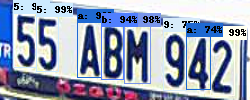

[('5', 13, [7, 0, 5, 16, 8, 18, 17, 13, 11, 25, 9, 6, 10, 1, 30, 21, 22, 28, 4, 37, 27, 34, 33, 15, 31, 12, 19, 29, 35, 26, 24, 32, 20, 3, 23, 2, 36, 14]), ('5', 36, [7, 5, 16, 18, 8, 17, 0, 13, 11, 25, 9, 1, 22, 10, 37, 28, 30, 6, 33, 15, 21, 31, 4, 27, 34, 35, 12, 19, 29, 24, 3, 32, 26, 2, 23, 20, 36, 14]), ('a', 77, [12, 35, 6, 0, 32, 25, 3, 13, 8, 20, 33, 1, 2, 19, 24, 37, 28, 16, 10, 30, 34, 29, 14, 31, 11, 23, 22, 17, 15, 36, 21, 26, 27, 18, 7, 4, 9, 5]), ('b', 101, [13, 10, 27, 29, 0, 28, 12, 11, 5, 19, 34, 16, 26, 23, 8, 15, 35, 3, 18, 2, 1, 20, 6, 21, 7, 14, 32, 30, 33, 17, 37, 36, 25, 31, 22, 24, 9, 4]), ('m', 124, [24, 34, 0, 19, 36, 35, 29, 25, 27, 22, 3, 28, 10, 33, 12, 13, 31, 17, 9, 26, 2, 20, 15, 11, 1, 23, 5, 37, 16, 7, 6, 21, 4, 32, 14, 30, 18, 8]), ('9', 163, [11, 10, 13, 0, 28, 5, 7, 18, 27, 30, 29, 8, 2, 16, 12, 26, 4, 21, 35, 15, 33, 34, 6, 32, 25, 14, 1, 37, 19, 23, 22, 20, 17, 31, 36, 3, 24, 9]), ('a', 186, [12, 6, 8, 0, 25, 32, 16, 35, 13, 33, 23, 19, 30, 34, 2

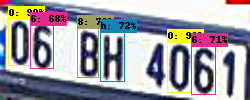

[('0', 8, [2, 28, 26, 32, 14, 18, 30, 15, 0, 10, 5, 21, 31, 33, 4, 35, 20, 25, 37, 3, 29, 13, 8, 11, 9, 12, 27, 36, 24, 6, 19, 23, 1, 17, 7, 16, 34, 22]), ('6', 30, [8, 7, 0, 5, 18, 30, 10, 16, 12, 28, 11, 13, 4, 35, 6, 2, 17, 37, 9, 32, 33, 25, 1, 22, 31, 3, 27, 24, 14, 34, 26, 19, 21, 20, 15, 23, 36, 29]), ('8', 77, [10, 13, 28, 29, 0, 27, 2, 26, 11, 18, 5, 12, 19, 35, 14, 32, 34, 8, 23, 3, 30, 33, 16, 36, 37, 7, 21, 24, 20, 1, 6, 15, 31, 25, 22, 4, 9, 17]), ('h', 100, [19, 34, 24, 29, 25, 0, 13, 27, 10, 28, 36, 35, 22, 12, 33, 16, 23, 6, 3, 11, 17, 7, 26, 15, 31, 37, 1, 20, 5, 9, 2, 18, 21, 32, 14, 8, 30, 4]), ('0', 167, [2, 28, 32, 26, 18, 14, 0, 30, 10, 15, 5, 31, 35, 33, 4, 21, 37, 29, 8, 20, 9, 3, 25, 11, 13, 36, 27, 24, 12, 6, 19, 23, 1, 17, 7, 16, 34, 22]), ('6', 191, [8, 7, 0, 5, 30, 18, 10, 4, 28, 16, 11, 12, 13, 2, 35, 37, 6, 33, 32, 22, 3, 14, 25, 9, 27, 17, 31, 1, 26, 24, 15, 21, 20, 34, 23, 36, 19, 29])]
elapsed time 68.00754952430725
[22, 47, 23, 67, 24]
ikinci ayrım in

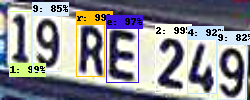

[('1', 9, [3, 20, 0, 15, 26, 35, 12, 37, 32, 28, 23, 31, 36, 2, 18, 33, 9, 24, 21, 6, 1, 13, 19, 14, 34, 25, 16, 17, 22, 30, 11, 27, 4, 29, 7, 10, 5, 8]), ('9', 32, [11, 10, 0, 13, 5, 28, 27, 7, 18, 29, 30, 2, 16, 8, 4, 26, 12, 35, 33, 25, 32, 15, 14, 22, 21, 37, 36, 19, 34, 6, 1, 20, 23, 31, 17, 3, 9, 24]), ('r', 76, [29, 27, 10, 13, 19, 0, 24, 34, 11, 35, 28, 22, 5, 36, 25, 18, 26, 33, 4, 2, 37, 23, 14, 16, 12, 15, 7, 3, 17, 1, 30, 31, 20, 21, 9, 6, 8, 32]), ('e', 106, [16, 17, 7, 18, 13, 0, 5, 22, 6, 28, 37, 14, 19, 21, 30, 11, 29, 8, 27, 9, 23, 4, 15, 3, 10, 1, 20, 34, 31, 33, 12, 25, 35, 26, 24, 36, 32, 2]), ('2', 155, [4, 5, 11, 0, 30, 37, 22, 28, 18, 7, 8, 29, 14, 13, 2, 25, 35, 15, 10, 26, 16, 20, 24, 1, 27, 6, 12, 9, 34, 33, 31, 36, 23, 21, 3, 32, 17, 19]), ('4', 187, [6, 0, 12, 25, 8, 16, 23, 19, 34, 13, 33, 7, 32, 30, 21, 28, 5, 3, 1, 35, 20, 17, 18, 15, 37, 4, 27, 14, 22, 10, 11, 31, 24, 2, 29, 9, 36, 26]), ('9', 217, [11, 10, 0, 5, 13, 28, 27, 18, 7, 29, 30, 2, 26, 16, 4, 

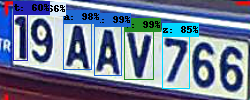

[('t', 13, [31, 36, 3, 0, 9, 20, 33, 17, 15, 27, 24, 26, 12, 35, 34, 19, 25, 2, 28, 6, 37, 1, 22, 18, 7, 23, 32, 4, 14, 5, 29, 11, 16, 13, 30, 8, 21, 10]), ('9', 29, [11, 10, 0, 13, 5, 28, 27, 18, 7, 29, 30, 2, 16, 8, 26, 12, 4, 35, 33, 32, 25, 15, 37, 14, 21, 19, 36, 34, 20, 1, 6, 23, 22, 9, 3, 31, 24, 17]), ('a', 63, [12, 6, 0, 35, 32, 8, 13, 20, 16, 19, 3, 25, 37, 28, 33, 1, 10, 30, 23, 2, 24, 14, 34, 31, 29, 22, 11, 15, 17, 21, 4, 7, 18, 27, 9, 26, 5, 36]), ('a', 94, [12, 6, 0, 35, 32, 8, 13, 3, 20, 16, 37, 19, 25, 28, 10, 1, 24, 30, 33, 2, 23, 29, 14, 34, 22, 31, 11, 15, 17, 27, 26, 21, 4, 36, 7, 18, 9, 5]), ('v', 124, [33, 36, 0, 34, 31, 25, 32, 9, 27, 24, 23, 17, 15, 1, 35, 28, 6, 12, 21, 3, 19, 7, 20, 18, 26, 30, 22, 2, 13, 14, 10, 37, 11, 4, 8, 16, 5, 29]), ('z', 162, [37, 9, 0, 4, 35, 22, 26, 28, 20, 36, 31, 15, 5, 3, 17, 13, 24, 2, 1, 16, 11, 27, 14, 8, 30, 6, 18, 33, 7, 25, 29, 21, 23, 32, 12, 10, 19, 34])]
elapsed time 67.53695726394653
[16, 34, 31, 30, 38]
ikinci ayrım in

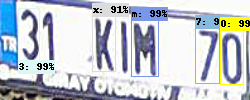

[('3', 18, [5, 18, 4, 0, 7, 30, 11, 28, 14, 8, 13, 22, 29, 37, 15, 2, 16, 10, 6, 27, 21, 9, 26, 25, 33, 1, 31, 32, 23, 17, 35, 24, 3, 20, 34, 12, 36, 19]), ('x', 92, [35, 22, 24, 25, 29, 36, 12, 19, 37, 34, 0, 13, 3, 33, 17, 30, 10, 20, 16, 4, 1, 11, 15, 2, 26, 31, 28, 9, 7, 14, 6, 27, 18, 32, 8, 23, 21, 5]), ('m', 131, [24, 34, 0, 19, 29, 36, 25, 35, 27, 10, 22, 28, 3, 13, 33, 12, 26, 2, 23, 17, 20, 9, 5, 15, 31, 7, 16, 11, 1, 37, 6, 21, 4, 14, 18, 32, 30, 8]), ('7', 195, [9, 37, 0, 31, 36, 26, 20, 17, 28, 35, 3, 15, 27, 5, 22, 1, 4, 24, 14, 2, 33, 13, 6, 16, 25, 11, 21, 32, 8, 19, 34, 7, 23, 18, 12, 30, 10, 29]), ('0', 220, [2, 26, 28, 32, 18, 14, 15, 30, 0, 10, 5, 31, 21, 35, 33, 4, 9, 20, 37, 3, 13, 25, 29, 8, 36, 24, 12, 11, 27, 6, 19, 1, 23, 17, 7, 16, 34, 22])]
elapsed time 67.67294049263
[74, 39, 64, 25]
ikinci ayrım indisi 2
ilk ayrım indisi 0
orta kısım ['x', 'm']
son kısm ['7', '0']
ilk kısım ['3']
PLAKA
['3', 'x', 'm', '7', '0']


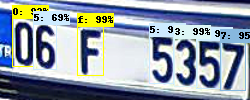

[('0', 12, [2, 26, 32, 0, 18, 15, 14, 28, 30, 10, 35, 21, 3, 31, 33, 20, 9, 8, 13, 5, 25, 23, 12, 1, 37, 24, 36, 7, 6, 29, 4, 16, 19, 17, 34, 11, 27, 22]), ('5', 33, [7, 8, 0, 18, 5, 16, 30, 13, 10, 11, 17, 28, 12, 4, 9, 6, 25, 37, 35, 22, 33, 2, 31, 1, 27, 32, 3, 24, 21, 34, 19, 26, 14, 15, 20, 23, 36, 29]), ('f', 77, [17, 27, 16, 0, 7, 9, 19, 31, 18, 36, 33, 1, 22, 24, 2, 15, 29, 34, 25, 23, 13, 5, 4, 37, 12, 14, 6, 28, 11, 8, 3, 21, 20, 10, 26, 30, 35, 32]), ('5', 149, [7, 0, 5, 18, 16, 8, 13, 11, 17, 25, 9, 1, 10, 6, 21, 27, 28, 4, 34, 22, 37, 33, 30, 12, 15, 29, 35, 31, 19, 32, 26, 24, 20, 36, 3, 2, 23, 14]), ('3', 174, [5, 4, 18, 7, 11, 30, 0, 28, 8, 14, 10, 13, 37, 2, 29, 6, 22, 15, 16, 27, 9, 26, 21, 1, 25, 33, 32, 31, 34, 17, 24, 23, 20, 35, 3, 12, 36, 19]), ('5', 196, [7, 0, 5, 8, 16, 13, 18, 11, 17, 9, 25, 10, 1, 6, 27, 21, 4, 34, 28, 22, 12, 37, 33, 15, 30, 29, 35, 31, 19, 26, 32, 24, 20, 36, 3, 2, 23, 14]), ('7', 220, [9, 37, 0, 31, 20, 36, 26, 35, 17, 3, 4, 28, 15, 27, 22

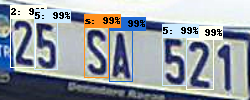

[('2', 10, [4, 37, 0, 5, 11, 22, 30, 29, 18, 14, 28, 2, 35, 25, 15, 8, 24, 13, 7, 20, 26, 16, 1, 9, 27, 10, 6, 33, 31, 12, 36, 34, 3, 21, 23, 17, 32, 19]), ('5', 34, [7, 5, 16, 0, 8, 18, 17, 13, 11, 25, 9, 22, 6, 30, 21, 1, 28, 37, 10, 4, 27, 31, 34, 33, 12, 19, 15, 35, 29, 24, 20, 26, 32, 3, 36, 23, 2, 14]), ('s', 84, [30, 22, 4, 8, 5, 0, 11, 14, 16, 6, 7, 37, 13, 12, 18, 21, 35, 25, 1, 28, 15, 29, 19, 20, 3, 10, 2, 27, 24, 23, 26, 17, 33, 32, 31, 36, 34, 9]), ('a', 109, [12, 35, 6, 0, 32, 25, 3, 13, 8, 20, 33, 24, 1, 19, 30, 2, 10, 37, 16, 28, 34, 14, 29, 11, 22, 31, 23, 17, 15, 36, 21, 26, 27, 18, 7, 9, 4, 5]), ('5', 162, [7, 5, 0, 16, 8, 18, 17, 13, 11, 25, 9, 6, 1, 21, 4, 30, 22, 10, 37, 28, 34, 27, 33, 15, 12, 31, 19, 29, 35, 24, 26, 20, 32, 3, 36, 23, 2, 14]), ('2', 186, [4, 37, 0, 5, 11, 30, 22, 14, 35, 29, 18, 2, 28, 25, 15, 8, 7, 13, 20, 24, 26, 16, 1, 9, 10, 27, 6, 12, 33, 31, 36, 34, 21, 3, 17, 23, 32, 19])]
elapsed time 67.7635428905487
[24, 50, 25, 53, 24]
ikinci ayrım in

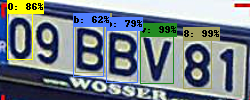

[('0', 7, [2, 0, 28, 10, 18, 32, 26, 14, 30, 5, 15, 8, 35, 33, 29, 13, 7, 4, 31, 3, 12, 37, 11, 6, 21, 24, 16, 27, 9, 25, 23, 34, 36, 20, 19, 1, 17, 22]), ('b', 73, [13, 10, 0, 28, 27, 29, 16, 19, 23, 18, 7, 26, 3, 12, 14, 34, 11, 8, 2, 1, 5, 37, 33, 32, 20, 6, 35, 21, 15, 22, 36, 25, 30, 24, 31, 17, 4, 9]), ('8', 75, [10, 13, 0, 29, 28, 27, 19, 18, 11, 26, 5, 14, 35, 2, 16, 3, 7, 12, 8, 23, 34, 37, 33, 24, 32, 36, 20, 21, 22, 30, 6, 1, 15, 4, 25, 17, 31, 9]), ('b', 106, [13, 10, 0, 27, 28, 29, 16, 19, 23, 34, 18, 11, 12, 7, 3, 26, 14, 1, 5, 37, 33, 8, 20, 2, 15, 6, 21, 35, 32, 22, 36, 25, 24, 30, 17, 31, 4, 9]), ('v', 140, [33, 0, 36, 34, 32, 25, 31, 27, 9, 23, 35, 15, 24, 17, 1, 28, 6, 21, 12, 3, 18, 7, 2, 30, 20, 26, 19, 22, 14, 13, 4, 10, 37, 8, 16, 11, 5, 29]), ('8', 183, [10, 28, 2, 0, 13, 11, 18, 29, 35, 8, 27, 26, 5, 19, 12, 14, 32, 33, 37, 7, 24, 3, 34, 23, 36, 30, 4, 31, 21, 6, 1, 20, 16, 25, 9, 22, 15, 17])]
elapsed time 67.49527049064636
[66, 2, 31, 34, 43]
ikinci ayrım ind

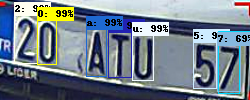

[('2', 14, [4, 0, 5, 37, 11, 30, 22, 29, 28, 18, 14, 7, 25, 2, 8, 35, 13, 15, 16, 24, 20, 10, 1, 26, 27, 6, 9, 12, 34, 33, 36, 31, 21, 23, 3, 17, 32, 19]), ('0', 37, [2, 28, 0, 26, 14, 18, 32, 30, 15, 10, 5, 31, 33, 21, 4, 3, 8, 37, 35, 29, 25, 20, 13, 12, 27, 24, 36, 6, 9, 23, 1, 11, 7, 16, 17, 34, 19, 22]), ('a', 86, [12, 35, 6, 0, 3, 32, 20, 2, 37, 13, 25, 33, 10, 28, 8, 24, 30, 1, 19, 29, 31, 16, 11, 14, 22, 34, 23, 15, 17, 18, 36, 21, 26, 4, 27, 7, 9, 5]), ('t', 108, [31, 20, 0, 9, 36, 17, 27, 15, 33, 24, 1, 3, 25, 26, 12, 6, 34, 35, 2, 7, 19, 29, 18, 14, 28, 37, 23, 11, 5, 32, 22, 13, 4, 10, 16, 21, 8, 30]), ('u', 132, [32, 2, 26, 21, 33, 23, 0, 18, 30, 15, 14, 25, 6, 28, 3, 10, 13, 1, 35, 12, 8, 34, 20, 7, 9, 19, 31, 36, 16, 17, 37, 24, 11, 27, 5, 29, 22, 4]), ('5', 193, [7, 5, 18, 0, 8, 16, 13, 11, 17, 25, 9, 1, 10, 28, 37, 6, 22, 15, 33, 21, 27, 4, 30, 34, 31, 35, 12, 29, 19, 32, 26, 24, 3, 2, 23, 20, 36, 14]), ('7', 217, [9, 37, 0, 4, 31, 36, 26, 35, 20, 28, 22, 17, 3, 24, 27

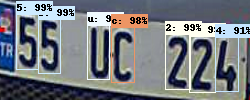

[('5', 16, [7, 5, 8, 16, 0, 18, 17, 13, 11, 25, 6, 1, 9, 10, 21, 22, 37, 33, 30, 34, 28, 15, 4, 31, 12, 27, 19, 29, 35, 3, 24, 32, 23, 2, 20, 26, 36, 14]), ('5', 38, [7, 5, 16, 8, 0, 18, 13, 11, 17, 25, 1, 9, 10, 6, 22, 21, 30, 37, 28, 33, 4, 15, 34, 31, 27, 12, 29, 19, 35, 24, 3, 26, 32, 20, 2, 23, 36, 14]), ('u', 87, [32, 21, 2, 26, 33, 23, 0, 6, 15, 18, 14, 30, 28, 25, 13, 1, 3, 12, 10, 8, 35, 34, 20, 19, 7, 31, 9, 5, 36, 16, 17, 37, 27, 11, 29, 24, 22, 4]), ('c', 111, [14, 18, 26, 28, 23, 16, 5, 30, 3, 21, 15, 0, 6, 2, 37, 19, 24, 20, 27, 13, 29, 1, 33, 4, 7, 22, 32, 9, 36, 17, 34, 11, 10, 31, 12, 25, 35, 8]), ('2', 165, [4, 37, 0, 5, 11, 30, 22, 2, 14, 28, 35, 29, 18, 25, 8, 20, 15, 7, 13, 16, 24, 26, 9, 10, 1, 27, 6, 12, 34, 33, 31, 21, 36, 17, 3, 23, 32, 19]), ('2', 189, [4, 37, 0, 5, 11, 30, 22, 35, 29, 18, 8, 25, 2, 14, 7, 28, 15, 13, 20, 24, 26, 16, 1, 9, 10, 27, 6, 12, 31, 36, 33, 34, 21, 17, 3, 23, 32, 19]), ('4', 215, [6, 0, 25, 19, 7, 12, 23, 16, 34, 33, 8, 17, 27, 13, 32

In [0]:
image_list = glob.glob(r"/content/drive/My Drive/models/research/object_detection/plates/*.jpg")
for img in image_list:
  start_time = time.time()
  PLATE = []
  
  image = img_resize(img)
  #image = cv2.imread(img)
  image_height, image_width, _ = image.shape
  image_expanded = np.expand_dims(image, axis=0)

  # Perform the actual detection by running the model with the image as input
  (boxes, scores, classes, num,multi_class) = sess.run(
      [detection_boxes, detection_scores, detection_classes, num_detections,detection_multiclass_scores],
      feed_dict={image_tensor: image_expanded})

  vis_util.visualize_boxes_and_labels_on_image_array(
      image,
      np.squeeze(boxes),
      np.squeeze(classes).astype(np.int32),
      np.squeeze(scores),
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.60,
      line_thickness=1)
  for index, score  in enumerate(scores[0]):
    
    if score > 0.60 :
  
        ids =[]
        label = category_index[np.squeeze(classes)[index]]['name']
        ymin, xmin, ymax, xmax = np.squeeze(boxes)[index]
        #data = [value for index, value in enumerate(scores[0])]
        #print(a)
        all_class = multi_class[0][index]
        t = []
        for i in range(len(all_class)):
          f = float(all_class[i])
          t.append(f)
        my_dic = dict(list(enumerate(t)))
        sorted_x = sorted(my_dic.items(), key=operator.itemgetter(1),reverse=True)
        #print(sorted_x)
        #print(label,a,int(xmin*image_width),data[index],score,scores[0][index],multi_class[0][index][a],all_class)
      


        #print(sorted_x)
        for idx, val in enumerate(sorted_x):
          ids.append(val[0])
        PLATE.append((label,int(xmin*image_width),ids))
        PLATE.sort(key=lambda tup: tup[1],reverse=False)
        #print(".............................") 
  stop_time = datetime.datetime.now()
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  print(PLATE)
  print("elapsed time {}".format(time.time()-start_time))
  my_plate = fark(PLATE)
  #print(PLATE[0][0])
  #print(detect_plate(PLATE))
  print("PLAKA")
  print(my_plate)
